# Group work 08/05/2023

In [1]:
import numpy as np
import scipy
import math
import random
import pandas as pd
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import os
import time

In [4]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
%config InlineBackend.figure_format='retina'

In [5]:
N = 10**4
a = 10
G = 1
M_tot = 10
M = np.ones(N)*M_tot/N

<center>Using a Plummer-Kuzmin distribution

$$\Sigma(R')=\frac{M}{2\pi}\frac{a}{(R'^2+a^2)^{3/2}}$$

$$M(R)=2\pi\int_0^RdR'R'\Sigma(R') = M\int_0^RdR'R'\frac{a}{(R'^2+a^2)^{3/2}}=\frac{1}{2}\int_0^{\frac{R^2}{a^2}}M\frac{1}{(1+y)^{3/2}}=\frac{M}{(1+y)^{1/2}}\Big|_0^{\frac{R^2}{a^2}}=M\left[1-\frac{1}{(\frac{R^2}{a^2}+1)^{1/2}}\right]$$

$$R = \left[\frac{1}{(1-\frac{M(R)}{M})^2}-1\right]^{1/2}\cdot a$$ with $$0<\frac{M(R)}{M}<1$$

and $$0< \theta < 2\pi$$

In [6]:
random.seed(0)

cdf   = np.random.uniform(0,1,N) #cdf = M(R)/M_tot

R     = ((1/(1-cdf)**2-1)**(1/2))*a
theta = np.random.uniform(0,2*np.pi,N)

#Sort in the same order
sort  = np.argsort(R)
R     = R[sort]
theta = theta[sort]

In [7]:
Sigma = ((M)/(2*np.pi)) * (a)/((R**2+a**2)**(3/2))

We can go in cartesian coordinates

In [8]:
X = R*np.cos(theta)
Y = R*np.sin(theta)
Z = np.zeros(N)

See the initial position of the particles

In [10]:
fig = plt.figure()
ax  = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z, color = 'royalblue', s = 2.5 ,alpha = .2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)
ax.set_aspect('equal')

plt.show()

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpuro621u9 37fe1867bb9c0161e8b349683bc85f5a.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./37fe1867bb9c0161e8b349683bc85f5a.tex
LaTeX2e <2022-06-01> patch level 5
L3 programming layer <2022-12-17>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpuro621u9/37fe1867bb9c0161e8b349683bc85f5a.log.




<Figure size 640x480 with 1 Axes>

To have circular orbits $$R\dot{\theta}^2 = \frac{GM(R)}{R^2}$$ we can write $\dot{\theta}$, the angular velocity of circular orbits, as $$\dot{\theta}^2 = \frac{G}{R^3}\left[1-\frac{1}{\frac{R^2}{a^2}+1}\right]\cdot M$$

In [26]:
theta_punto = (G*M*(1-1/(R**2/a**2+1)**(1/2))/R**3)**(1/2)

The Toomre parameter is defined as $$Q=\frac{\sigma^2k^2}{\pi G^2\Sigma^2}$$

We can define $k$ as $$k^2=\frac{\partial\Phi_{eff}}{\partial R^2}\Big|_{0,0} = \frac{\partial}{\partial R}\left(\frac{\partial}{\partial R}\left(\Phi + \frac{L_z^2}{2R^2}\right)\right)\Big|_{0,0} = 4\pi G \Sigma - \frac{\partial}{\partial R}\left(\frac{L_z^2}{R^3}\right) = 4\pi G \Sigma + \frac{3 L_z^2}{R^4}$$

with $$\Phi = -\frac{G M}{\sqrt{R^2+(a+|z|)^2}} = -\frac{G M}{\sqrt{R^2+a^2}}$$

and $$L_z = R^2\dot{\theta}$$
so $$k^2 = 4\pi G \Sigma + 3 \dot{\theta}^2$$

In [27]:
k_2 = 4*np.pi*Sigma + 3*theta_punto**2

We vary the Toomre parameter from instability at $Q=0.1$ in the inner part of the disk to stability at $Q=10$ in the outer part of the disk

In [28]:
Q = np.geomspace(0.1,10,N)

In [29]:
Q[::100]

array([0.1       , 0.10471334, 0.10964883, 0.11481695, 0.12022866,
       0.12589544, 0.13182932, 0.13804288, 0.1445493 , 0.1513624 ,
       0.15849662, 0.1659671 , 0.17378969, 0.18198098, 0.19055836,
       0.19954002, 0.20894501, 0.21879329, 0.22910576, 0.23990428,
       0.25121178, 0.26305224, 0.27545078, 0.2884337 , 0.30202855,
       0.31626418, 0.33117078, 0.34677997, 0.36312488, 0.38024018,
       0.39816218, 0.41692891, 0.43658017, 0.45715767, 0.47870505,
       0.50126803, 0.52489448, 0.54963453, 0.57554066, 0.60266783,
       0.63107359, 0.66081822, 0.69196481, 0.72457944, 0.75873131,
       0.79449288, 0.83194001, 0.87115214, 0.91221248, 0.95520813,
       1.00023031, 1.04737453, 1.09674083, 1.14843392, 1.20256348,
       1.25924435, 1.31859678, 1.38074669, 1.44582594, 1.51397259,
       1.58533122, 1.66005322, 1.73829713, 1.82022893, 1.90602246,
       1.99585972, 2.08993131, 2.18843682, 2.29158523, 2.39959536,
       2.51269638, 2.63112823, 2.75514217, 2.88500131, 3.02098

and compute $\sigma$ for every particle

In [30]:
sigma = (np.pi*Sigma*Q/k_2)**(1/2)

and write the velocities as $$\dot{x}=\dot{R}cos\theta - R sin\theta\dot{\theta} = - R sin\theta\dot{\theta}$$ $$\dot{y}=\dot{R}sin\theta + R cos\theta\dot{\theta} = R cos\theta\dot{\theta}$$

In [31]:
x_punto = -R*np.sin(theta)*theta_punto
y_punto = +R*np.cos(theta)*theta_punto

The $\sigma$ is the dispersion of the velocities from a gaussian centered in $\dot{x}$ and $\dot{y}$

In [32]:
v_x     = np.random.normal(x_punto, sigma)
v_y     = np.random.normal(y_punto, sigma)
v_z     = np.zeros(N)

Write the initial parameters for the tree code

In [33]:
np.savetxt('masses.txt', M)
np.savetxt('positions.txt',np.column_stack((X,Y,Z)))
np.savetxt('velocities.txt', np.column_stack((v_x,v_y,v_z)))

with open('initial_data.txt', 'w+') as file:
    file.write(repr(N)+'\n3\n0\n')
    file.write(open('masses.txt','r').read()+open('positions.txt','r').read()+open('velocities.txt','r').read())

# Simulation

In [40]:
open('output.txt', 'w').close()
tstop = 200
dtime = 1/32
dtout = 1/2
os.system('cd tree && ./treecode in=initial_data.txt tstop='+ str(tstop) +' dtime='+ str(dtime) +' dtout='+ str(dtout) +' out=output.txt > logoutput.txt')

0

In [49]:
data = pd.read_csv("tree/output.txt", names=list(range(7)), sep = ' ')

In [50]:
def dati (data,N):
    
    x = []
    y = []
    z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
    
    r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,r,t

In [51]:
x,y,z,r,time = dati(data, N)

# Animation

In [52]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx   = (np.abs(array-value)).argmin()
    return idx

In [53]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

  0%|          | 0/401 [00:00<?, ?it/s]

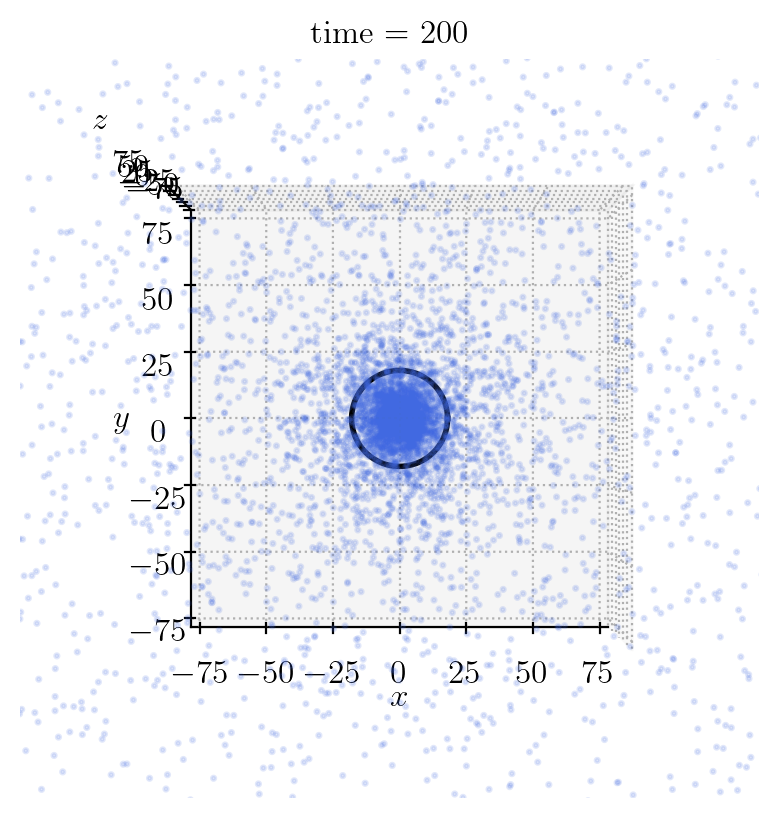

In [72]:
# simulation
from matplotlib import animation
from tqdm.notebook import tqdm

def update(num):
    N = len(M)   #N_particles
    l = 75
    ax.clear()
    
    ax.scatter(x[:,num-1], y[:,num-1], z[:,num-1], color = 'royalblue', s = 2.5 ,alpha = .15)        # Updating Point Location

    ax.view_init(elev=90, azim=-90)
    
    ax.set_title(f'time = {round(time[num])}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    
    theta_ = np.linspace(0,2*np.pi,1000)
    ax.plot(R[find_nearest(Q,1)]*np.cos(theta_),R[find_nearest(Q,1)]*np.sin(theta_), color='black', lw=2, label='Q=1')
    

## Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')

line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(time))))

# Saving the Animation
f = r"disk1.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif)

plt.show()